In [1]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from matplotlib import pyplot
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from mrcnn.config import Config
from mrcnn.model import MaskRCNN
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
# gpu_available = tf.config.list_physical_devices('GPU')
gpu_available = tf.test.is_gpu_available()
gpu_available


2023-01-12 05:26:33.467734: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-01-12 05:26:34.334960: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-12 05:26:34.335496: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-12 05:26:34.336008: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-12 05:26:34.393231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-12 05:2

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-01-12 05:26:34.698214: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-01-12 05:26:34.698242: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2023-01-12 05:26:34.698247: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2023-01-12 05:26:34.698585: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-12 05:26:34.699558: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-12 05:26:34.699819: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

True

In [2]:
from matplotlib.patches import Rectangle


# define the prediction configuration
class PredictionConfig(Config):
	# define the name of the configuration
	NAME = "fruits_cfg"
	# number of classes (background + 3 fruits)
	NUM_CLASSES = 1 + 6
	# simplify GPU config
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1
	DETECTION_MIN_CONFIDENCE = 0.7
    

In [3]:
# create config
cfg = PredictionConfig()
# cfg.display()
# define the model
model = MaskRCNN(mode='inference', model_dir='logs', config=cfg)
# load model weights
model.load_weights('logs/corn_cfg20230111T2359/mask_rcnn_corn_cfg_0047.h5', by_name=True)


Instructions for updating:
Use fn_output_signature instead


2023-01-12 05:26:37.688723: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)


Re-starting from epoch 47


In [14]:
import skimage
#Test on a single image

#fruit_img = skimage.io.imread("datasets/renamed_to_numbers/images/184.jpg") #Try 028, 120, 222, 171

#Download a new image for testing...
#https://c2.peakpx.com/wallpaper/603/971/645/fruit-fruit-bowl-fruits-apple-wallpaper-preview.jpg
fruit_img = skimage.io.imread("test_corn/corn_streak_4.jpg")
detected = model.detect([fruit_img])[0] 
detected['class_ids']

array([5, 6], dtype=int32)

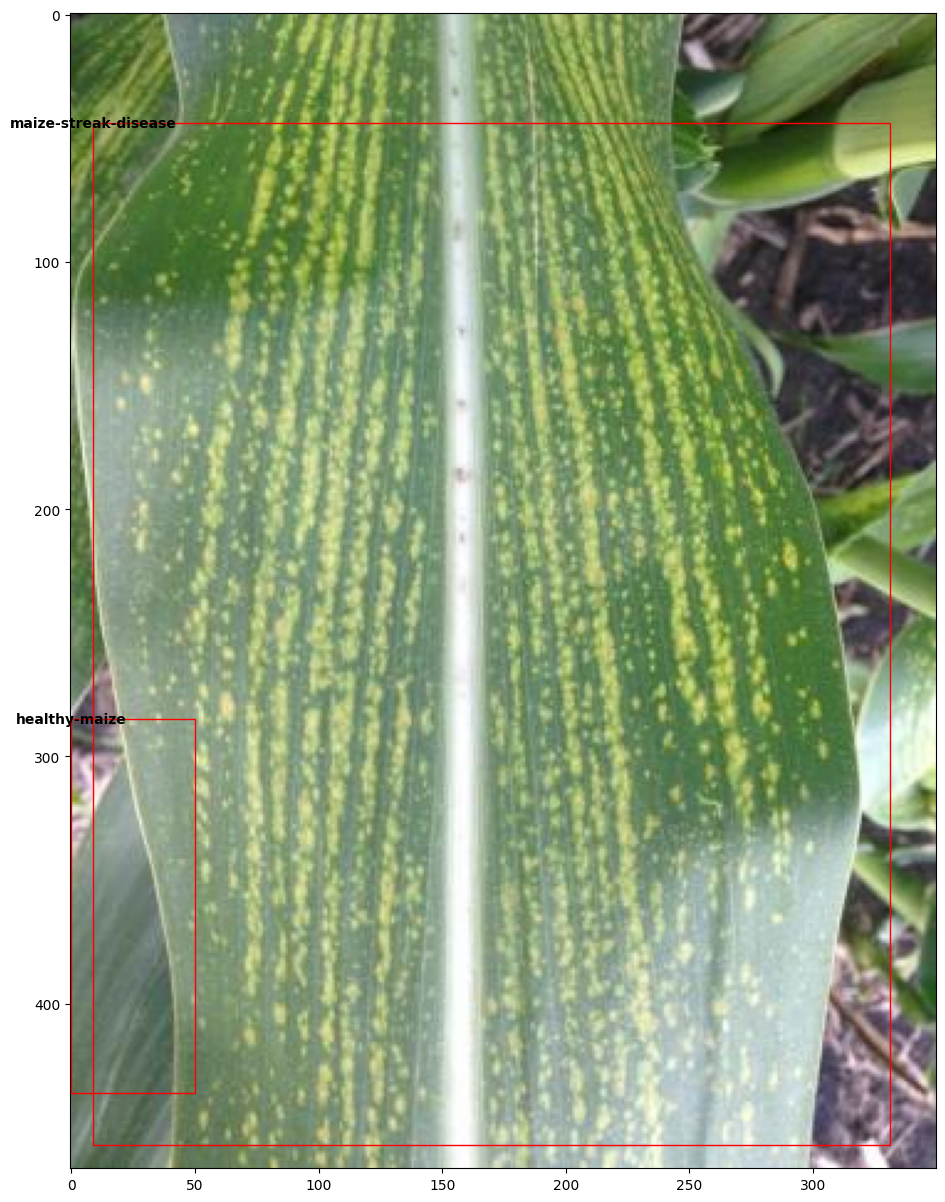

In [15]:
pyplot.figure(figsize=(20,15))
pyplot.imshow(fruit_img)
ax = pyplot.gca()
class_names = ['fall-armyworm-larva',
               'fall-armyworm-larval-damage',
               'fall-armyworm-frass',
               "fall-armyworm-egg",
               "healthy-maize",
               "maize-streak-disease"]
class_id_counter=1
for box in detected['rois']:
    #print(box)
#get coordinates
    detected_class_id = detected['class_ids'][class_id_counter-1]
    #print(detected_class_id)
    #print("Detected class is :", class_names[detected_class_id-1])
    y1, x1, y2, x2 = box
    #calculate width and height of the box
    width, height = x2 - x1, y2 - y1
    #create the shape
    ax.annotate(class_names[detected_class_id-1], (x1, y1), color='black', weight='bold', fontsize=10, ha='center', va='center')
    rect = Rectangle((x1, y1), width, height, fill=False, color='red')
#draw the box
    ax.add_patch(rect)
    class_id_counter+=1
#show the figure

pyplot.show()